## 608. Tree Node

```
Table: Tree

+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| p_id        | int  |
+-------------+------+

id is the column with unique values for this table.
Each row of this table contains information about the id of a node and the id of its parent node in a tree.

The given structure is always a valid tree.
 
Each node in the tree can be one of three types:

"Leaf": if the node is a leaf node.
"Root": if the node is the root of the tree.
"Inner": If the node is neither a leaf node nor a root node.
Write a solution to report the type of each node in the tree.

Return the result table in any order.

The result format is in the following example.
```

Example 1:

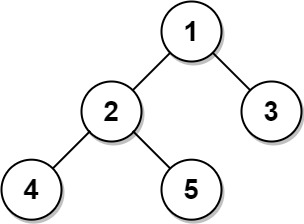

```
Input: 
Tree table:
+----+------+
| id | p_id |
+----+------+
| 1  | null |
| 2  | 1    |
| 3  | 1    |
| 4  | 2    |
| 5  | 2    |
+----+------+

Output: 
+----+-------+
| id | type  |
+----+-------+
| 1  | Root  |
| 2  | Inner |
| 3  | Leaf  |
| 4  | Leaf  |
| 5  | Leaf  |
+----+-------+

Explanation: 
Node 1 is the root node because its parent node is null and it has child nodes 2 and 3.
Node 2 is an inner node because it has parent node 1 and child node 4 and 5.
Nodes 3, 4, and 5 are leaf nodes because they have parent nodes and they do not have child nodes.
```

Example 2:

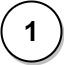

```
Input: 
Tree table:
+----+------+
| id | p_id |
+----+------+
| 1  | null |
+----+------+

Output: 
+----+-------+
| id | type  |
+----+-------+
| 1  | Root  |
+----+-------+

Explanation: If there is only one node on the tree, you only need to output its root attributes.

Note: This question is the same as 3054: Binary Tree Nodes.

Accepted: 223,097/298.8K
Acceptance Rate: 74.7%
```

### MySQL solution

```
Runtime: 445 ms
Beats: 61.10%

WITH cte AS (
    SELECT
        id,
        P_id
    FROM
        Tree
)
SELECT
    DISTINCT
        t1.id,
        CASE
            WHEN t1.p_id IS NULL THEN 'Root'
            WHEN t2.p_id IS NULL THEN 'Leaf'
            ELSE 'Inner'
        END AS 'type'
FROM cte AS t1    
LEFT JOIN cte AS t2 ON t1.id = t2.p_id;
```


### Pandas solution

Complexity: O(n2)

Runtime: 334 ms / Beats: 31.08%

Memory: 66.74 MB / Beats: 89.44%

```
import pandas as pd

def tree_node(tree: pd.DataFrame) -> pd.DataFrame:
    parents = [x for x in tree.p_id.to_list() if type(x) == int]
    
    def category_assign(row):
        if str(row["p_id"]) == "<NA>":
            return "Root"
        elif row["id"] in parents:
            return "Inner"
        else:
            return "Leaf"

    tree["type"] = tree.apply(category_assign, axis = 1)
    return tree[["id","type"]] 
```